In [1]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn import metrics
%run function.py

In [2]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/sigma*sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [13]:
option_data = pd.read_csv("paper_data_test.csv")
#option_data2 = pd.read_csv("option_full_data_validation.csv")
#option_data = pd.concat([option_data1, option_data2], ignore_index = True)

In [14]:
option_data

,code,exchange_code,date,pre_settle,pre_close,open,high,low,close,change_pct_close,...,moneyness_ratio,T,r,30days_close_vol,60days_close_vol,30days_log_return_vol,60days_log_return_vol,30days_HV,60days_HV,90days_HV
0,10001212.XSHG,XSHG,2018-09-14,0.0004,0.0004,0.0003,0.0005,0.0003,0.0004,0.0000,...,0.797966,12,2.8623,0.039261,0.051188,0.013151,0.014442,0.207774,0.227859,0.207686
1,10000716.XSHG,XSHG,2016-11-18,0.1190,0.1177,0.1180,0.1256,0.1078,0.1099,-7.6471,...,0.959556,5,2.2258,0.034209,0.036737,0.006096,0.005746,0.095644,0.090128,0.109212
2,10001335.XSHG,XSHG,2018-07-04,0.0455,0.0455,0.0441,0.0515,0.0387,0.0395,-13.1868,...,0.927755,21,3.0602,0.091865,0.083381,0.013247,0.012579,0.208955,0.198465,0.190004
3,10001970.XSHG,XSHG,2019-11-27,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0000,...,1.035000,0,2.6369,0.029047,0.039174,0.006889,0.007250,0.109295,0.114582,0.129315
4,10001321.XSHG,XSHG,2018-07-12,0.0311,0.0313,0.0316,0.0383,0.0315,0.0368,18.3280,...,0.837847,167,3.0654,0.103087,0.094625,0.014978,0.012938,0.236310,0.204192,0.195685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35281,10002953.XSHG,XSHG,2020-12-15,0.0224,0.0224,0.0204,0.0231,0.0139,0.0208,-7.1429,...,0.989714,8,2.7888,0.061896,0.085403,0.009650,0.010452,0.166160,0.171098,0.169668
35282,10000734.XSHG,XSHG,2016-12-19,0.0922,0.0914,0.0953,0.1003,0.0929,0.1003,8.7852,...,0.951556,191,3.0491,0.045165,0.071293,0.009004,0.007639,0.134585,0.116697,0.121371
35283,10000711.XSHG,XSHG,2016-10-11,0.1620,0.1614,0.1626,0.1676,0.1588,0.1634,0.8642,...,0.985238,15,2.1513,0.020789,0.032891,0.005473,0.007388,0.086124,0.117077,0.128086
35284,10001934.XSHG,XSHG,2019-08-12,0.0983,0.0983,0.0942,0.0953,0.0895,0.0907,-7.7314,...,1.067511,226,2.5906,0.056650,0.099179,0.009098,0.010317,0.144097,0.163374,0.204326


In [15]:
for i in option_data.index:
    a = option_data.iloc[i, :]
    S = a['underlying_close']
    K = a['exercise_price']
    T = a['T']/365
    r = a['r']/100
    sigma1 = a['30days_close_vol']
    sigma2 = a['60days_close_vol']
    sigma3 = a['30days_log_return_vol']
    sigma4 = a['30days_log_return_vol']
    sigma5 = a['30days_HV']
    sigma6 = a['60days_HV']
    sigma7 = a['90days_HV']
    
    if a['contract_type'] == 'CO':
        option_data.loc[i, 'bs_c30'] = bs_call(S, K, T, r, sigma1)
        option_data.loc[i, 'bs_c60'] = bs_call(S, K, T, r, sigma2)
        option_data.loc[i, 'bs_lr30'] = bs_call(S, K, T, r, sigma3)
        option_data.loc[i, 'bs_lr60'] = bs_call(S, K, T, r, sigma4)
        option_data.loc[i, 'bs_HV30'] = bs_call(S, K, T, r, sigma5)
        option_data.loc[i, 'bs_HV60'] = bs_call(S, K, T, r, sigma6)
        option_data.loc[i, 'bs_HV90'] = bs_call(S, K, T, r, sigma7)        
    else:
        option_data.loc[i, 'bs_c30'] = bs_put(S, K, T, r, sigma1)
        option_data.loc[i, 'bs_c60'] = bs_put(S, K, T, r, sigma2)
        option_data.loc[i, 'bs_lr30'] = bs_put(S, K, T, r, sigma3)
        option_data.loc[i, 'bs_lr60'] = bs_put(S, K, T, r, sigma4)
        option_data.loc[i, 'bs_HV30'] = bs_put(S, K, T, r, sigma5)
        option_data.loc[i, 'bs_HV60'] = bs_put(S, K, T, r, sigma6)
        option_data.loc[i, 'bs_HV90'] = bs_put(S, K, T, r, sigma7)

In [16]:
option_data

,code,exchange_code,date,pre_settle,pre_close,open,high,low,close,change_pct_close,...,30days_HV,60days_HV,90days_HV,bs_c30,bs_c60,bs_lr30,bs_lr60,bs_HV30,bs_HV60,bs_HV90
0,10001212.XSHG,XSHG,2018-09-14,0.0004,0.0004,0.0003,0.0005,0.0003,0.0004,0.0000,...,0.207774,0.227859,0.207686,-0.083923,-0.118452,-5.533970e-04,-5.533970e-04,-0.207348,-0.207046,-0.207348
1,10000716.XSHG,XSHG,2016-11-18,0.1190,0.1177,0.1180,0.1256,0.1078,0.1099,-7.6471,...,0.095644,0.090128,0.109212,-0.036566,-0.036643,-1.900949e-02,-1.900949e-02,-0.033324,-0.033793,-0.032123
2,10001335.XSHG,XSHG,2018-07-04,0.0455,0.0455,0.0441,0.0515,0.0387,0.0395,-13.1868,...,0.208955,0.198465,0.190004,-0.052229,-0.052931,-1.468039e-02,-1.468039e-02,-0.032045,-0.034192,-0.035900
3,10001970.XSHG,XSHG,2019-11-27,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0000,...,0.109295,0.114582,0.129315,-0.049000,-0.049000,-4.900000e-02,-4.900000e-02,-0.049000,-0.049000,-0.049000
4,10001321.XSHG,XSHG,2018-07-12,0.0311,0.0313,0.0316,0.0383,0.0315,0.0368,18.3280,...,0.236310,0.204192,0.195685,-0.018446,-0.017115,-2.081738e-14,-2.081738e-14,0.016249,0.001876,-0.001527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35281,10002953.XSHG,XSHG,2020-12-15,0.0224,0.0224,0.0204,0.0231,0.0139,0.0208,-7.1429,...,0.166160,0.171098,0.169668,-0.003835,0.000934,-1.295097e-02,-1.295097e-02,0.017502,0.018518,0.018224
35282,10000734.XSHG,XSHG,2016-12-19,0.0922,0.0914,0.0953,0.1003,0.0929,0.1003,8.7852,...,0.134585,0.116697,0.121371,0.076387,0.088923,7.328157e-02,7.328157e-02,0.125429,0.114754,0.117528
35283,10000711.XSHG,XSHG,2016-10-11,0.1620,0.1614,0.1626,0.1676,0.1588,0.1634,0.8642,...,0.086124,0.117077,0.128086,-0.009498,-0.008014,-7.995536e-03,-7.995536e-03,0.000408,0.005557,0.007400
35284,10001934.XSHG,XSHG,2019-08-12,0.0983,0.0983,0.0942,0.0953,0.0895,0.0907,-7.7314,...,0.144097,0.163374,0.204326,-0.003149,0.010758,-7.949197e-14,-7.949197e-14,0.037400,0.050497,0.080039


The MSE of BS prediction is: 0.010221755775797809


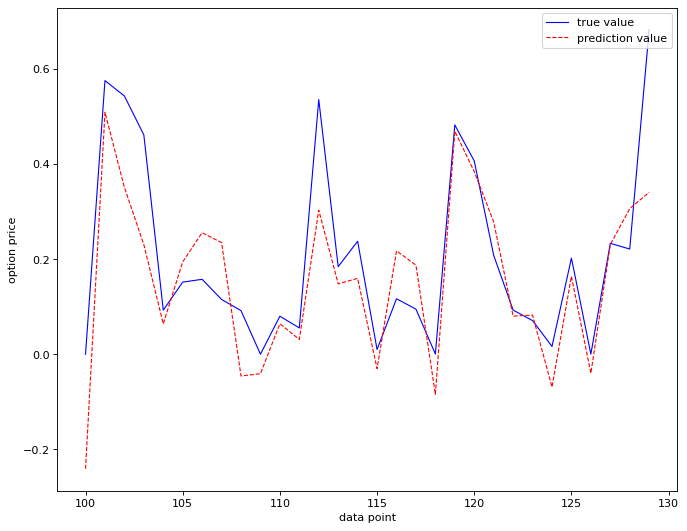

In [17]:
MSE_BS = metrics.mean_squared_error(option_data['close'], option_data['bs_HV90'])

print("The MSE of BS prediction is: %s" %MSE_BS) 

prediction_visualization(option_data['close'], option_data['bs_HV90'], 30, 100)

In [18]:
option_data.to_csv('paper_pricing_by_bsm_test.csv')